In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('../data/Copy of Week2_challenge_data_source(CSV).csv')

In [11]:
def inspect_data(data):
    print("Data Info:")
    print(data.info())
    
    print("\nFirst Few Rows:")
    print(data.head())
    print("\nMissing Values:")
    
    print(data.isnull().sum())
    print("\nDescriptive Statistics:")
    
    print(data.describe())

In [15]:
inspect_data(data)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT D

In [17]:
def top_10_handsets(data):
    top_handsets = data['Handset Type'].value_counts().head(10)
    print("\nTop 10 Handsets:")
    print(top_handsets)
top_10_handsets(data)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [18]:
def top_3_manufacturers(data):
    top_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
    print("\nTop 3 Manufacturers:")
    print(top_manufacturers)
    return top_manufacturers.index

In [19]:
top_3_manufacturers(data)


Top 3 Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Index(['Apple', 'Samsung', 'Huawei'], dtype='object', name='Handset Manufacturer')

In [20]:
def top_5_handsets_per_manufacturer(data, top_manufacturers):
    """
    Finds the top 5 handsets for each of the top 3 manufacturers.
    Args:
        data (pd.DataFrame): The dataset.
        top_manufacturers (pd.Index): Names of the top 3 manufacturers.
    """
    for manufacturer in top_manufacturers:
        print(f"\nTop 5 Handsets for {manufacturer}:")
        handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
        print(handsets)

In [21]:
def aggregate_application_data(data):
    """
    Aggregates data for different application categories (e.g., Social Media, Google, etc.).
    Args:
        data (pd.DataFrame): The dataset.
    Returns:
        pd.DataFrame: Aggregated application data.
    """
  
    application_columns = {
        'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
        'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
        'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
        'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
        'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
        'Other': ['Other DL (Bytes)', 'Other UL (Bytes)'],
    }

    aggregated_data = {}
    for app, cols in application_columns.items():
        dl_col, ul_col = cols
        total_dl = data[dl_col].sum()
        total_ul = data[ul_col].sum()
        total_data = total_dl + total_ul
        aggregated_data[app] = {'Total DL (Bytes)': total_dl, 'Total UL (Bytes)': total_ul, 'Total Data Volume': total_data}

    aggregated_df = pd.DataFrame.from_dict(aggregated_data, orient='index')
    aggregated_df = aggregated_df.sort_values(by='Total Data Volume', ascending=False)

    print("\nAggregated Application Data:")
    print(aggregated_df)
    return aggregated_df

In [22]:
def aggregate_application_data(data):
    """
    Aggregates data for different application categories (e.g., Social Media, Google, etc.).
    Args:
        data (pd.DataFrame): The dataset.
    Returns:
        pd.DataFrame: Aggregated application data.
    """
  
    application_columns = {
        'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
        'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
        'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
        'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
        'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
        'Other': ['Other DL (Bytes)', 'Other UL (Bytes)'],
    }

    aggregated_data = {}
    for app, cols in application_columns.items():
        dl_col, ul_col = cols
        total_dl = data[dl_col].sum()
        total_ul = data[ul_col].sum()
        total_data = total_dl + total_ul
        aggregated_data[app] = {'Total DL (Bytes)': total_dl, 'Total UL (Bytes)': total_ul, 'Total Data Volume': total_data}

    aggregated_df = pd.DataFrame.from_dict(aggregated_data, orient='index')
    aggregated_df = aggregated_df.sort_values(by='Total Data Volume', ascending=False)

    print("\nAggregated Application Data:")
    print(aggregated_df)
    return aggregated_df




def segment_users_by_session_duration(data):
    """
    Segments users into deciles based on total session duration.
    Args:
        data (pd.DataFrame): The dataset.
    Returns:
        pd.DataFrame: Dataset with decile information.
    """
  
    session_duration_col = 'Dur. (ms)' 

    if session_duration_col not in data.columns:
        print(f"Column '{session_duration_col}' not found in the dataset.")
        return data

  
    user_id_col = 'MSISDN/Number'  
    if user_id_col not in data.columns:
        print(f"Column '{user_id_col}' not found in the dataset.")
        return data

   
    total_duration_per_user = data.groupby(user_id_col)[session_duration_col].sum().reset_index()
    total_duration_per_user.columns = [user_id_col, 'Total Session Duration']

   
    total_duration_per_user['Decile'] = pd.qcut(total_duration_per_user['Total Session Duration'], 10, labels=False)

    print("\nUser Decile Segmentation Summary:")
    decile_summary = total_duration_per_user.groupby('Decile').agg({'Total Session Duration': ['mean', 'sum']})
    print(decile_summary)


    data = data.merge(total_duration_per_user[[user_id_col, 'Decile']], on=user_id_col, how='left')
    return data

In [27]:
def univariate_analysis(data, columns):
    """
    Performs univariate analysis on specified columns and visualizes distributions.
    Args:
        data (pd.DataFrame): The dataset.
        columns (list): List of columns to analyze.
    """
    for col in columns:
        if col in data.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(data[col], kde=True, bins=30, color='blue')
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
univariate_columns = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']

/home/hunegna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


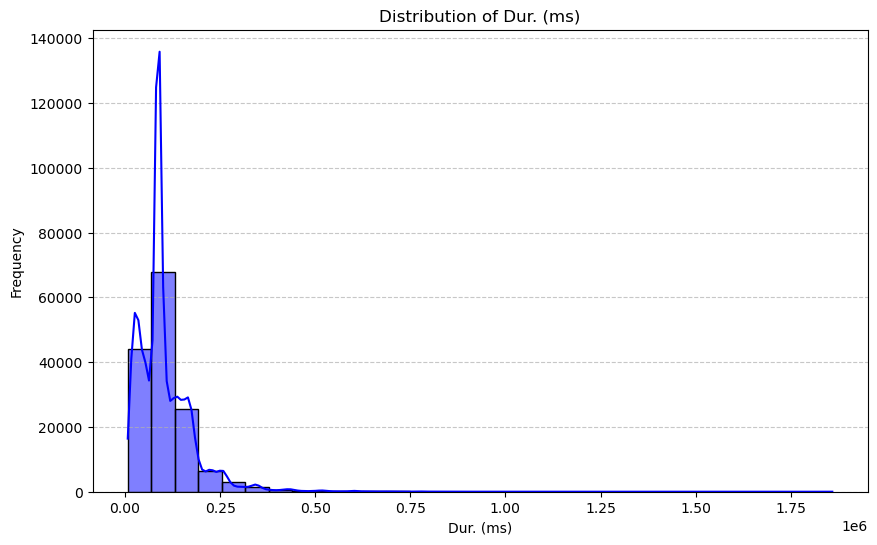

/home/hunegna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


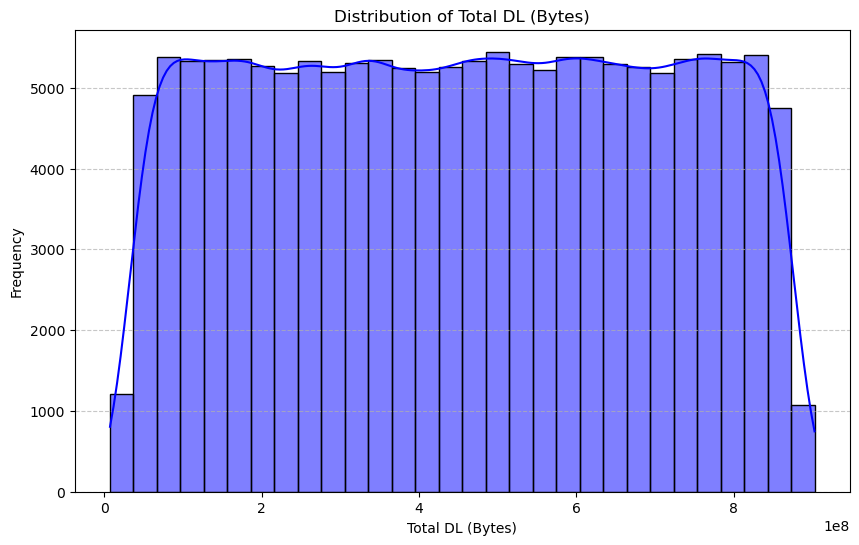

/home/hunegna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


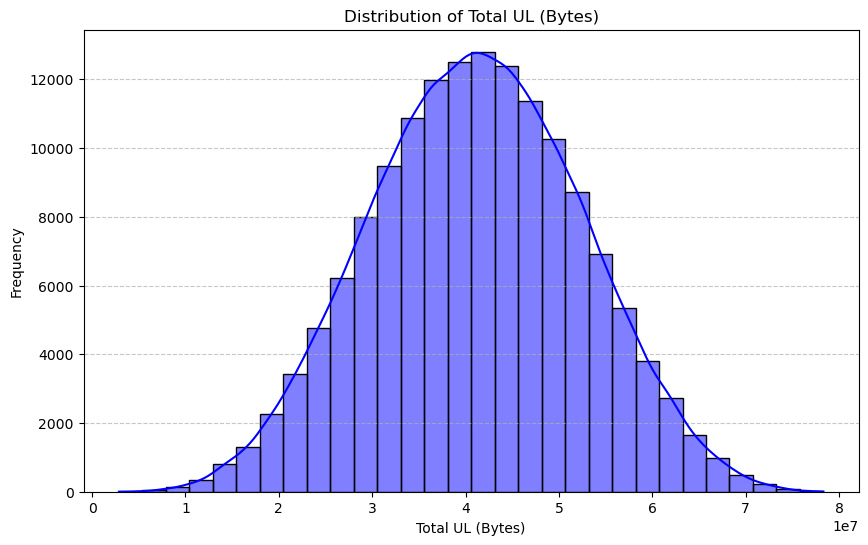

In [28]:
univariate_analysis(data, univariate_columns)

In [29]:
def bivariate_analysis(data, x_col, y_col):
    """
    Performs bivariate analysis between two columns using scatter plots and correlation.
    Args:
        data (pd.DataFrame): The dataset.
        x_col (str): Column for the x-axis.
        y_col (str): Column for the y-axis.
    """
    if x_col in data.columns and y_col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[x_col], y=data[y_col], alpha=0.7, color='purple')
        plt.title(f"{x_col} vs. {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        
        corr = data[[x_col, y_col]].corr().iloc[0, 1]
        print(f"Correlation between {x_col} and {y_col}: {corr:.2f}")

In [31]:
def bivariate_analysis(data, x_col, y_col):
    """
    Performs bivariate analysis between two columns using scatter plots and correlation.
    Args:
        data (pd.DataFrame): The dataset.
        x_col (str): Column for the x-axis.
        y_col (str): Column for the y-axis.
    """
    if x_col in data.columns and y_col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[x_col], y=data[y_col], alpha=0.7, color='purple')
        plt.title(f"{x_col} vs. {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        
        corr = data[[x_col, y_col]].corr().iloc[0, 1]
        print(f"Correlation between {x_col} and {y_col}: {corr:.2f}")


In [ ]:
def eda_insights(data):
    """
    Summarizes key findings from the dataset.
    Args:
        data (pd.DataFrame): The dataset.
    """
    print("\nKey Insights:")
    print(f"Average session duration: {data['Dur. (ms)'].mean():.2f} ms")
    print(f"Total data volume: {data['Total DL (Bytes)'].sum() + data['Total UL (Bytes)'].sum():.2e} Bytes")
    print(f"Number of unique users: {data['MSISDN/Number'].nunique()}")